In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("diamonds.csv")

In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
ID,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [10]:
df_num=df.select_dtypes(['int64','float64'])

In [11]:
df_cat=df.select_dtypes(['object'])

In [12]:
from scipy.stats import skew

In [13]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

carat 1.1166148681277797
depth -0.08229173779627727
table 0.7968736878796518
price 1.6183502776053016
x 0.3786658120772097
y 2.4340990250113648
z 1.5223802221853722


In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [16]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cut      53940 non-null  int32
 1   color    53940 non-null  int32
 2   clarity  53940 non-null  int32
dtypes: int32(3)
memory usage: 1.0 MB


In [17]:
df_cat

,cut,color,clarity
ID,,,
1,2,1,3
2,3,1,2
3,1,1,4
4,3,5,5
5,1,6,3
...,...,...,...
53936,2,0,2
53937,1,0,2
53938,4,0,2


In [18]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [19]:
df_new

,carat,depth,table,price,x,y,z,cut,color,clarity
ID,,,,,,,,,,
1,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2


In [21]:
x=df_new.drop("price",axis=1)
y=df_new["price"]

In [42]:
# Scaling the data
x_mean = np.mean(x)

In [43]:
x_mean

carat       0.797940
depth      61.749405
table      57.457184
x           5.731157
y           5.734526
z           3.538734
cut         2.553003
color       2.594197
clarity     3.835150
dtype: float64

In [44]:
x_std = np.std(x)

In [45]:
x_std

carat      0.474007
depth      1.432608
table      2.234470
x          1.121750
y          1.142124
z          0.705692
cut        1.027698
color      1.701089
clarity    1.724575
dtype: float64

In [48]:
x_x = (x-x_mean) / x_std

In [49]:
x_x

,carat,depth,table,x,y,z,cut,color,clarity
ID,,,,,,,,,
1,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,-0.538099,-0.937163,-0.484264
2,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0.434949,-0.937163,-1.064117
3,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-1.511147,-0.937163,0.095589
4,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0.434949,1.414272,0.675442
5,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-1.511147,2.002131,-0.484264
...,...,...,...,...,...,...,...,...,...
53936,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,-0.538099,-1.525021,-1.064117
53937,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,-1.511147,-1.525021,-1.064117
53938,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,1.407998,-1.525021,-1.064117


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_x, y, test_size=0.3)

In [51]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(9,))])

In [52]:
model.compile(optimizer="sgd", loss="mse")

In [53]:
trained_model = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1180/1180 [==============================] - 1s 567us/step - loss: 4436778.4041
Epoch 2/50
1180/1180 [==============================] - 1s 563us/step - loss: 1911444.9264
Epoch 3/50
1180/1180 [==============================] - 1s 533us/step - loss: 1936684.9781
Epoch 4/50
1180/1180 [==============================] - 1s 536us/step - loss: 1818138.3090
Epoch 5/50
1180/1180 [==============================] - 1s 563us/step - loss: 1833496.5618
Epoch 6/50
1180/1180 [==============================] - 1s 578us/step - loss: 1823795.9470
Epoch 7/50
1180/1180 [==============================] - 1s 567us/step - loss: 1746740.7430
Epoch 8/50
1180/1180 [==============================] - 1s 624us/step - loss: 1834848.8347
Epoch 9/50
1180/1180 [==============================] - 1s 580us/step - loss: 1784011.5848
Epoch 10/50
1180/1180 [==============================] - 1s 621us/step - loss: 1831464.1083
Epoch 11/50
1180/1180 [==============================] - 1s 567us/step - loss: 1785456.62

In [54]:
trained_model

In [55]:
trained_model.history

{'loss': [2686543.75,
  1915283.0,
  1865870.625,
  1846135.875,
  1831995.125,
  1833070.75,
  1830074.375,
  1829699.625,
  1828531.125,
  1829416.5,
  1827082.625,
  1830909.875,
  1830014.625,
  1829468.375,
  1830789.625,
  1829044.875,
  1829045.5,
  1829282.625,
  1828484.375,
  1829961.5,
  1828917.0,
  1827854.375,
  1829776.625,
  1831058.5,
  1827825.75,
  1827868.75,
  1828065.0,
  1829183.25,
  1828250.375,
  1831711.5,
  1828974.5,
  1828545.625,
  1829152.875,
  1828933.125,
  1828154.0,
  1828641.25,
  1829051.375,
  1829966.0,
  1828489.375,
  1830411.875,
  1829867.5,
  1830227.75,
  1827748.25,
  1827374.0,
  1829355.75,
  1828244.625,
  1831807.625,
  1832429.0,
  1825595.0,
  1828953.75]}

In [56]:
trained_model.history['loss']

[2686543.75,
 1915283.0,
 1865870.625,
 1846135.875,
 1831995.125,
 1833070.75,
 1830074.375,
 1829699.625,
 1828531.125,
 1829416.5,
 1827082.625,
 1830909.875,
 1830014.625,
 1829468.375,
 1830789.625,
 1829044.875,
 1829045.5,
 1829282.625,
 1828484.375,
 1829961.5,
 1828917.0,
 1827854.375,
 1829776.625,
 1831058.5,
 1827825.75,
 1827868.75,
 1828065.0,
 1829183.25,
 1828250.375,
 1831711.5,
 1828974.5,
 1828545.625,
 1829152.875,
 1828933.125,
 1828154.0,
 1828641.25,
 1829051.375,
 1829966.0,
 1828489.375,
 1830411.875,
 1829867.5,
 1830227.75,
 1827748.25,
 1827374.0,
 1829355.75,
 1828244.625,
 1831807.625,
 1832429.0,
 1825595.0,
 1828953.75]

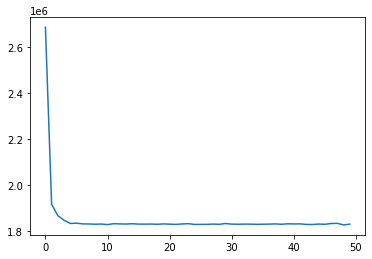

In [57]:
plt.plot(trained_model.history['loss'])
plt.show()

In [58]:
y_hat = model.predict(x_test)

In [59]:
y_hat

array([[ 461.8523 ],
       [ 876.7219 ],
       [6185.9927 ],
       ...,
       [5807.62   ],
       [ 776.26196],
       [-553.1023 ]], dtype=float32)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test, y_hat)

0.8823440920404613